# P3, hw7
## My code with explanations

Codes mostly are from the 2Dfft file. My image is a picture of an optical table.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from PIL import Image, ImageOps

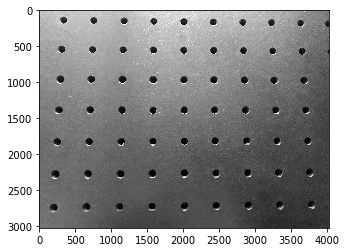

In [3]:
# read the image and plot on a gray scale
opticaltable = np.array(ImageOps.grayscale(Image.open('P3.jpg')))
plt.imshow(opticaltable, "gray")
plt.show()

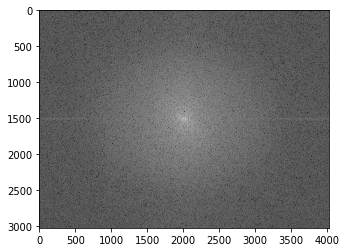

In [4]:
# apply a 2D FFT
F_opticaltable = np.fft.fft2(opticaltable)
F_opticaltable_center = np.fft.fftshift(F_opticaltable)
plt.imshow(np.log(1+np.abs(F_opticaltable_center)), "gray")
plt.show()

## Modifications

Here I modify the shape of x and y so that lowpass shape is compatible with the original image shape.

In [17]:
# set a filter
R = 7
x = np.linspace(-10,10,4032)
y = np.linspace(-10,10,3024)
xx, yy = np.meshgrid(x, y, sparse=True)
highpass = (np.sqrt(xx**2 + yy**2) >= R)*1

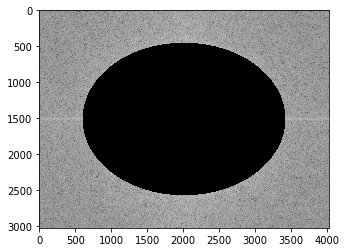

In [18]:
# filter the FFT image
plt.imshow(np.log(1+np.abs(highpass*F_opticaltable_center)), "gray")
plt.show()

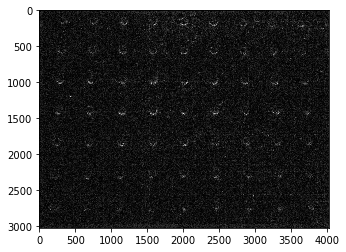

In [19]:
# filter the original image
filtered = np.fft.ifft2(highpass*F_opticaltable_center)
plt.imshow(np.log(1+np.abs(filtered)), "gray")
plt.show()